
# Project: Medical Appointment Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
This dataset contains information on over a hundred thousand medical appointments in Brazil, and focuses mainly on the question whether or not patients show up for their appointments. For each row, there is information on a number of characteristics of the patient such as the patient's id, gender, age, appointment date, and so on.


### Questions for Analysis
* How often did people miss appointments?

* Does the gender of the patient has a relation with the absence?

* Does the age of the patient have a relation with the absence?

* Did patients miss appointments because of not receiving a message??

* Does the scholarship affect the patient's attendance?

In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section, the data would be loaded, checked for cleanliness, and then trimmed and cleaned for analysis.


### General Properties

In [2]:
# Loading data
df = pd.read_csv('./Downloads/Documents/noshowappointments-kagglev2-may-2016.csv')

In [3]:
df.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [4]:
#Checking basic info about Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
#Checking basic shape about Data
df.shape

(110527, 14)

In [6]:
#checking the sum of the duplicated data
df.duplicated().sum()

0

In [7]:
#checking number of unique entries in each column
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

According to the results above there are 110,527 entries described by 14 fields. There are also no null fields.
Also,the results above shows that, there are as many unique AppointmentIDs as there are rows but it seems not to be so for the other columns. Because the AppointmentIDs are unique to each row it would be set as the index of the dataframe.

In [8]:
# seting AppointmentID as index.
df.set_index('AppointmentID', inplace=True ,verify_integrity=True)
df.head(10)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
AppointmentID,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5642503,5.589978e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
5642549,4.262962e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
5642828,8.679512e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
5642494,8.841186e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5626772,9.598513e+13,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
5630279,7.336882e+14,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
5630575,3.449833e+12,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
5638447,5.639473e+13,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No


In [9]:
#Checking statistic description of data
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


With the exception of Handcap, which has a maximum value of 4, all fields have a range of 0 to 1. It may be the case that that Handcap represents the patient's overall number of handicaps.

### Data Cleaning
In this section, the data would be cleaned and tidied

From the statistic description above,it seems the minimum age is -1 which is an unusual value and possibly a mistake. As a result, that age value would be dropped.

In [10]:
#Dropping age value below 0
df.drop(df.index[df['Age'] < 0 ], inplace =True)

In [11]:
#Confirming change of minimum age value
df.describe()

,PatientId,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [12]:
#Changing AppointmentDay and ScheduledDay to datetime data type
df['AppointmentDay']= pd.to_datetime(df['AppointmentDay'])
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])

In [13]:
df.dtypes

PatientId                     float64
Gender                         object
ScheduledDay      datetime64[ns, UTC]
AppointmentDay    datetime64[ns, UTC]
Age                             int64
Neighbourhood                  object
Scholarship                     int64
Hipertension                    int64
Diabetes                        int64
Alcoholism                      int64
Handcap                         int64
SMS_received                    int64
No-show                        object
dtype: object

The day of week would now be extracted from the AppointmentDay field to answer one of the research questions.

In [14]:
#extracting day of the week from the AppointmentDay and creating a new column to display them
df['WeekDay'] = df['AppointmentDay'].dt.day_name()
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,WeekDay
AppointmentID,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday


In [15]:
#counting the number of appointments for each WeekDay value
df.WeekDay.value_counts().to_frame(name='Total Appointments')

,Total Appointments
Wednesday,25867
Tuesday,25640
Monday,22714
Friday,19019
Thursday,17247
Saturday,39


In [16]:
# Renaming the old No-show column
df.rename(columns={'No-show':'NoShow'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 5642903 to 5629448
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110526 non-null  float64            
 1   Gender          110526 non-null  object             
 2   ScheduledDay    110526 non-null  datetime64[ns, UTC]
 3   AppointmentDay  110526 non-null  datetime64[ns, UTC]
 4   Age             110526 non-null  int64              
 5   Neighbourhood   110526 non-null  object             
 6   Scholarship     110526 non-null  int64              
 7   Hipertension    110526 non-null  int64              
 8   Diabetes        110526 non-null  int64              
 9   Alcoholism      110526 non-null  int64              
 10  Handcap         110526 non-null  int64              
 11  SMS_received    110526 non-null  int64              
 12  NoShow          110526 non-null  object             
 13  WeekDay

In [17]:
# Categoring the different age values into age group to create better distinction between them
def group_ages(Age):
    if Age < 13:
        return "Child"
    elif Age < 20:
        return "Teen"
    elif Age < 40:
        return "Young Adult"
    elif Age < 60:
        return "Middle-Aged"
    else:
        return "Old"

In [18]:
# Add a new column for age groups
df['AgeCatergory'] = df['Age'].apply(lambda x: group_ages(x))
df.head()

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,NoShow,WeekDay,AgeCatergory
AppointmentID,,,,,,,,,,,,,,,
5642903,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Friday,Old
5642503,5.589978e+14,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Friday,Middle-Aged
5642549,4.262962e+12,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No,Friday,Old
5642828,8.679512e+11,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Friday,Child
5642494,8.841186e+12,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Friday,Middle-Aged


In [19]:
#Adding a binary field for no shows. 
#This will make calculating total and average numbers of no shows easier in analysis.
df['BinNoShow'] = (df.NoShow == "Yes").astype(int)

During the data wrangling process, the first step was loading the data into a pandas DataFrame. Basic information about the data, such as the number of rows and columns, was then checked. Descriptive statistics were also calculated to get a better understanding of the data.

Duplicated data was checked and removed during the cleaning process. The 'AppointmentID' column was set as the DataFrame's index, and negative age values were removed. Data types were changed to make them more appropriate for the analysis. Weekday values were extracted to enable better analysis of no-shows. Column names were also renamed to make them more descriptive, and age values were categorized to make them easier to work with.

Lastly, a binary field was added for no-shows, indicating whether a patient attended their appointment or not. These data cleaning steps aimed to ensure the data was accurate and ready for further analysis.

<a id='eda'></a>
## Exploratory Data Analysis

### How often did people miss their appointments?

In [20]:
# checking how many show at appointments and how many didn't
df['NoShow'].value_counts().to_frame()

,NoShow
No,88207
Yes,22319


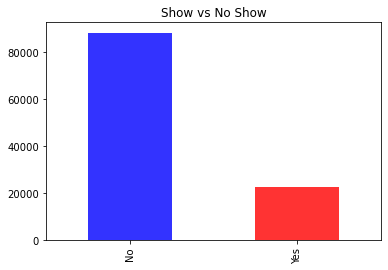

In [21]:
#Plotting show up on a bar graph
colors = ['blue','red']
df['NoShow'].value_counts().plot(kind = 'bar', color=colors, alpha= .8 )
plt.title('Show vs No Show');

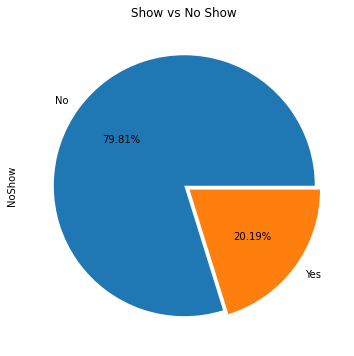

In [22]:
#Plotting Show up in a piechart and checking percentage difference
df['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05))
plt.title('Show vs No Show');

22319 patients as revealed from the data missed their appointments. That means just a little over 20% of all appointments resulted in no shows. 
Meaning, about 80% of the time patients made it for appointments

In [23]:
#Creating functions for patient that showed and those who didn't
Absent = df[df['NoShow'] == 'Yes']
Showed = df[df['NoShow'] == 'No']

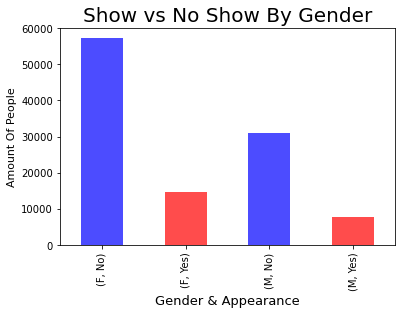

In [24]:
#Bar graph representation of the those who showed and didn't for each gender
df.groupby ('Gender')['NoShow'].value_counts().plot(kind = 'bar', title= 'Males Vs Female Attendance' ,color=colors, alpha=.7 )
plt.xlabel('Gender & Appearance', fontsize=13)
plt.ylabel('Amount Of People', fontsize=11)
plt.title('Show vs No Show By Gender', fontsize=20);

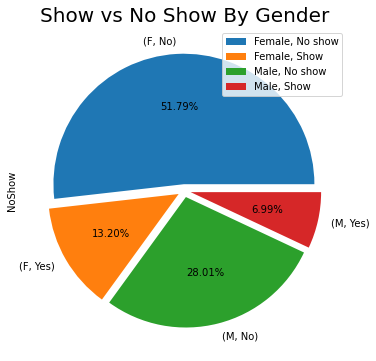

In [25]:
#Pie chart displaying total percentage patient who made it or missed the appointment by gender.
df.groupby('Gender')['NoShow'].value_counts().plot(subplots = True, kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(.05, .05 , .05, .05));
plt.title('Show vs No Show By Gender', fontsize=20)
plt.legend(["Female, No show", "Female, Show", "Male, No show", "Male, Show"]);

It from above graphs that there are far more females who had appointments than males.
To understand more about which gender miss appointment more, they need to to be look at seperately

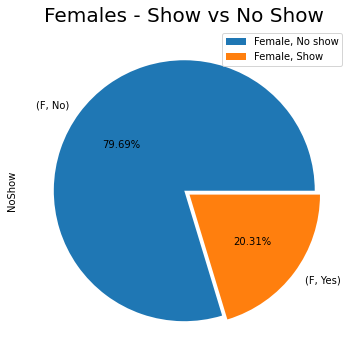

In [26]:
#Pie chart displaying percentage of female patient who made it or missed the appointment
Females = df[df['Gender'] == 'F']
Females.groupby('Gender')['NoShow'].value_counts().plot( kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05) )
plt.title('Females - Show vs No Show', fontsize=20);
plt.legend(["Female, No show", "Female, Show"]);

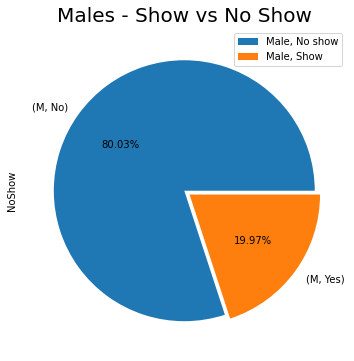

In [27]:
#Pie chart displaying percentage of male patient who made it or missed the appointment.
Males = df[df['Gender'] == 'M']
Males.groupby('Gender')['NoShow'].value_counts().plot( kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05) )
plt.title('Males - Show vs No Show', fontsize=20);
plt.legend([ "Male, No show", "Male, Show"]);

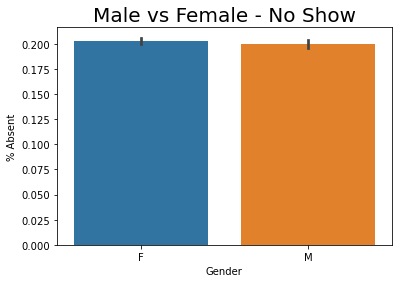

In [28]:
# bar graph of the percentage of noshows for each gender
plt.title('Male vs Female - No Show', fontsize=20);
ax  = sns.barplot(x=df.Gender, y=df.BinNoShow)
ax.set(ylabel='% Absent')
plt.show()

From the above graphs one can notice that, though by a little margin, females generally missed thier appointments more than males.

### Does the certian age group attend appoinments than other?

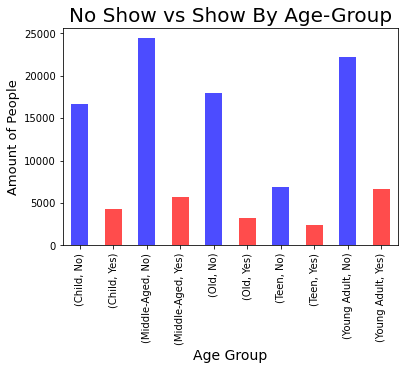

In [29]:
#Bar graph of show andno shows for each age groups
df.groupby ('AgeCatergory')['NoShow'].value_counts().plot(kind = 'bar', title= 'Age Appointment Status' ,color=colors, alpha=.7 )
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Amount of People', fontsize=13);
plt.title('No Show vs Show By Age-Group', fontsize=20);

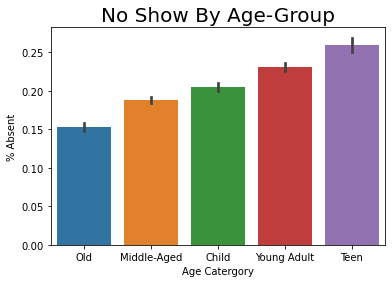

In [30]:
#bar graph of the percentage of noshows for each age group
plt.title('No Show By Age-Group', fontsize=20);
ax = sns.barplot(x=df.AgeCatergory, y=df.BinNoShow)
ax.set(ylabel='% Absent', xlabel= 'Age Catergory' )
plt.show()

The group that miss the most are teens and the group that missed the least are the old.

### Does the day of the week affect the patient attendance?

In [31]:
#Number of patients that showed up or din't show up for each day
df.groupby ('WeekDay')['NoShow'].value_counts().to_frame(name='Appointments per Day')

Appointments per Day
WeekDay   NoShow                      
Friday    No                     14982
          Yes                     4037
Monday    No                     18024
          Yes                     4690
Saturday  No                        30
          Yes                        9
Thursday  No                     13909
          Yes                     3338
Tuesday   No                     20488
          Yes                     5152
Wednesday No                     20774
          Yes                     5093

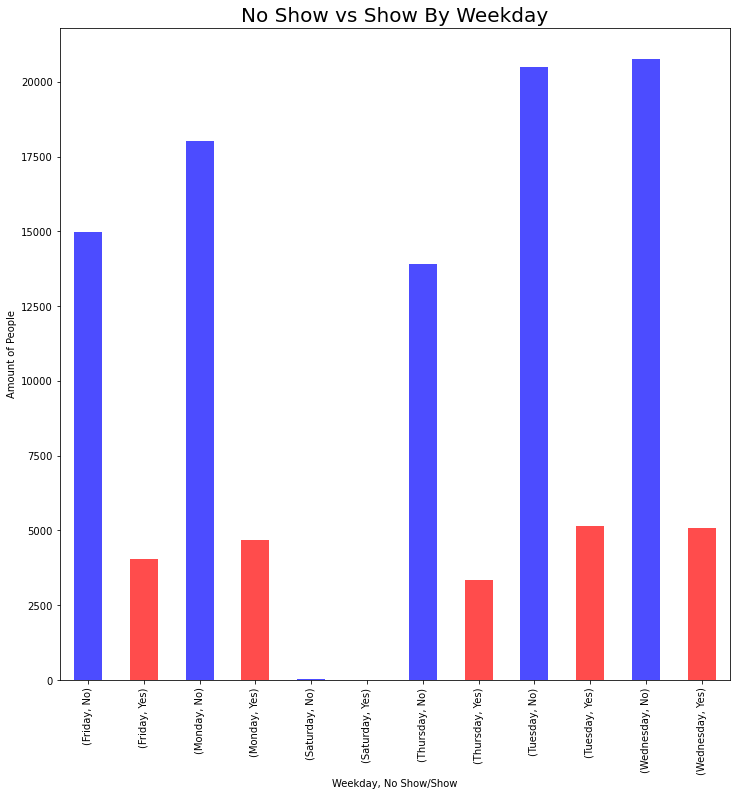

In [32]:
#Bar graph representation of the those who showed and didn't for each week day
df.groupby ('WeekDay')['NoShow'].value_counts().plot(kind = 'bar',figsize=(12,12),color=colors, alpha=.7);
plt.title('No Show vs Show By Weekday', fontsize=20);
plt.ylabel("Amount of People")
plt.xlabel("Weekday, No Show/Show");

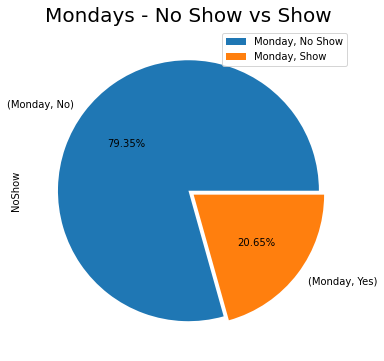

In [33]:
#Pie chart showing the percentage of patients who showed or didn't show up for their appointment on Monday
Monday = df[df['WeekDay'] == 'Monday']
Monday.groupby('WeekDay')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05));
plt.title('Mondays - No Show vs Show', fontsize=20)
plt.legend(["Monday, No Show", "Monday, Show"]);

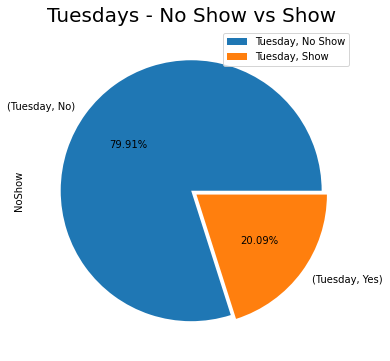

In [34]:
#Pie chart showing the percentage of patients who showed or didn't show up for their appointment on Tuesday
Tuesday = df[df['WeekDay'] == 'Tuesday']
Tuesday.groupby('WeekDay')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05));
plt.title('Tuesdays - No Show vs Show', fontsize=20)
plt.legend(["Tuesday, No Show", "Tuesday, Show"]);

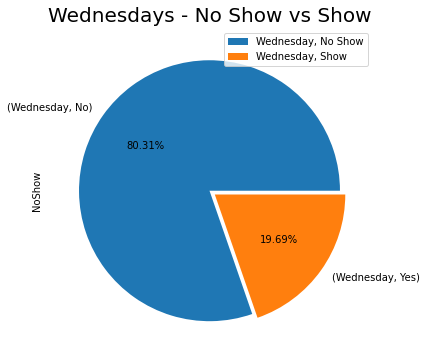

In [35]:
#Pie chart showing the percentage of patients who showed or didn't show up for their appointment on Wednesday
Wednesday = df[df['WeekDay'] == 'Wednesday']
Wednesday.groupby('WeekDay')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05))
plt.title('Wednesdays - No Show vs Show', fontsize=20)
plt.legend(["Wednesday, No Show", "Wednesday, Show"]);

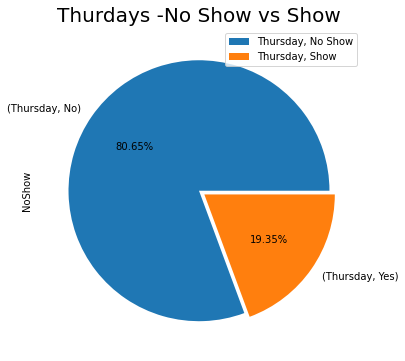

In [36]:
#Pie chart showing the percentage of patients who showed or didn't show up for their appointment on Thursday
Thursday = df[df['WeekDay'] == 'Thursday']
Thursday.groupby('WeekDay')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05))
plt.title('Thurdays -No Show vs Show', fontsize=20)
plt.legend(["Thursday, No Show", "Thursday, Show"]);

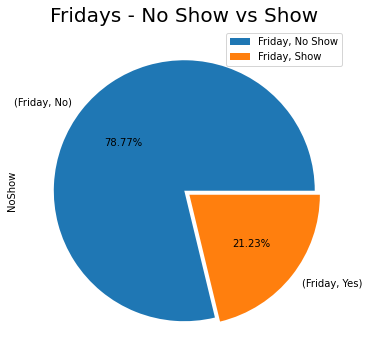

In [37]:
#Pie chart showing the percentage of patients who showed or didn't show up for their appointment on Friday
Friday = df[df['WeekDay'] == 'Friday']
Friday.groupby('WeekDay')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05))
plt.title('Fridays - No Show vs Show', fontsize=20)
plt.legend(["Friday, No Show", "Friday, Show"]);

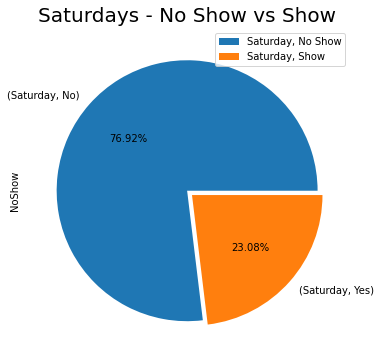

In [38]:
#Pie chart showing the percentage of patients who showed or didn't show up for their appointment on Saturday
Saturday = df[df['WeekDay'] == 'Saturday']
Saturday.groupby('WeekDay')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05));
plt.title('Saturdays - No Show vs Show', fontsize=20)
plt.legend(["Saturday, No Show", "Saturday, Show"]);

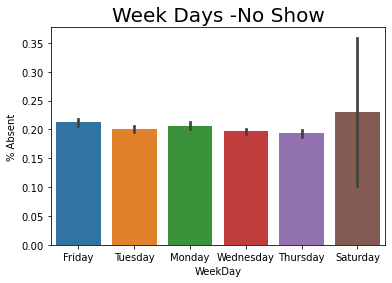

In [39]:
#bar graph of the percentage of noshows for each day of the week
plt.title('Week Days -No Show', fontsize=20);
ax = sns.barplot(x=df.WeekDay, y=df.BinNoShow)
ax.set(ylabel='% Absent')
plt.show()

Though unusual,the day with the most missing saturday. It would be assumped that this is the day many would make it because they may be less busy but that doesn't seem to be the case. The error bar is also highest for Saturdays due to the extremely low incidence of Saturday apointments.

### Did patients miss appointments because of not receiving a message?

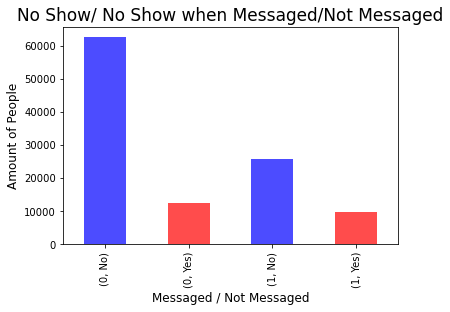

In [40]:
#Bar graph representation of the those who showed and didn't when sent message or not sent message
df.groupby ('SMS_received')['NoShow'].value_counts().plot(kind = 'bar',color=colors, alpha=.7)
plt.xlabel('Messaged / Not Messaged', fontsize=12)
plt.ylabel('Amount of People', fontsize=12)
plt.title('No Show/ No Show when Messaged/Not Messaged', fontsize=17);

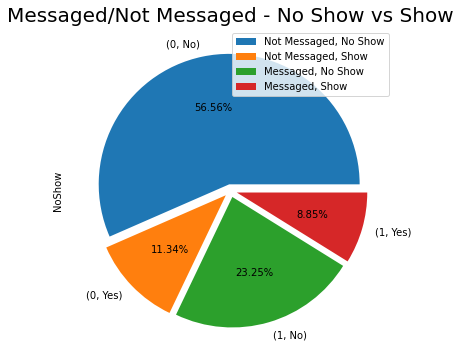

In [41]:
#Pie chart showing the percentage of patients who showed or didn't show up for patients messaged or not messaged
df.groupby('SMS_received')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(.05, .05 , .05, .05))
plt.title('Messaged/Not Messaged - No Show vs Show', fontsize=20)
plt.legend(["Not Messaged, No Show", "Not Messaged, Show", "Messaged, No Show", "Messaged, Show"]);

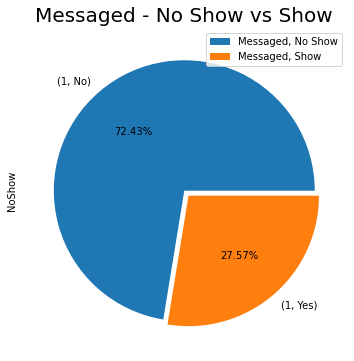

In [42]:
#Pie chart showing the percentage of patients messaged who showed up or didn't show up for their appointment
Messeaged = df[df['SMS_received'] == 1]
Messeaged.groupby('SMS_received')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05))
plt.title('Messaged - No Show vs Show', fontsize=20)
plt.legend(["Messaged, No Show", "Messaged, Show"]);

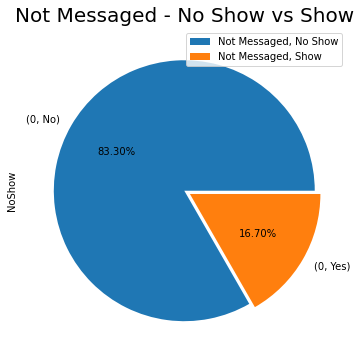

In [43]:
#Pie chart showing the percentage of patients not messaged who showed up or didn't show up for their appointment
Not_messeaged = df[df['SMS_received'] == 0]
Not_messeaged.groupby('SMS_received')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05))
plt.title('Not Messaged - No Show vs Show', fontsize=20)
plt.legend(["Not Messaged, No Show", "Not Messaged, Show"]);

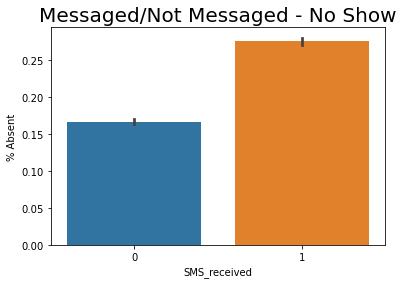

In [44]:
#bar graph of the percentage of noshows for each sms condition
plt.title('Messaged/Not Messaged - No Show', fontsize=20)
ax = sns.barplot(x=df.SMS_received, y=df.BinNoShow)
ax.set(ylabel='% Absent')
plt.show()

Suprisely, patient's who received a message seem to have missed more than patients who didn't receive a message. That's means not receiving a message may not have been the cause for patients missing their appointments.

### Does the scholarship affect the patient's attendance?

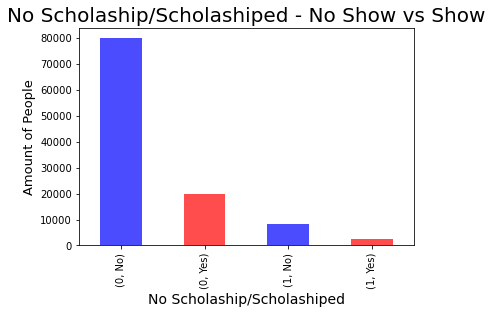

In [45]:
#Bar graph representation of the those who showed up and didn't show up with scholarship or no scholarship
df.groupby('Scholarship')['NoShow'].value_counts().plot(kind = 'bar', title= 'Scholarshiped Attendance' ,color=colors, alpha=.7 )
plt.xlabel('No Scholaship/Scholashiped', fontsize=14)
plt.ylabel('Amount of People', fontsize=13)
plt.title("No Scholaship/Scholashiped - No Show vs Show", fontsize=20);

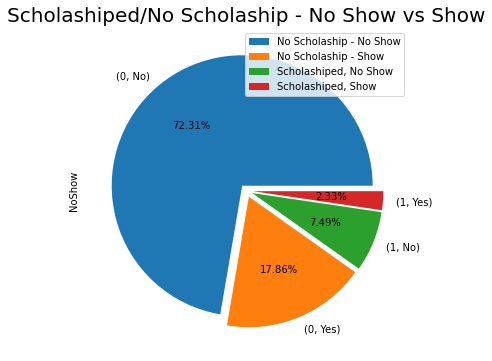

In [46]:
df.groupby('Scholarship')['NoShow'].value_counts().plot(subplots = True, kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(.05, .05 , .05, .05));
plt.title('Scholashiped/No Scholaship - No Show vs Show', fontsize=20)
plt.legend(["No Scholaship - No Show", "No Scholaship - Show", "Scholashiped, No Show", "Scholashiped, Show"]);

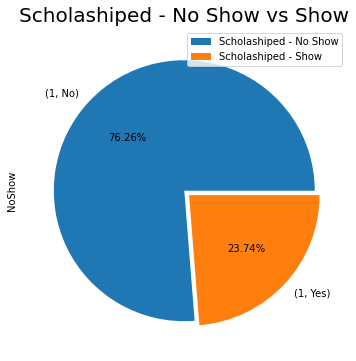

In [47]:
#Pie chart showing the percentage of patients with scholarship who showed up or didn't show up for their appointment
Scholarship = df[df['Scholarship'] == 1]
Scholarship.groupby('Scholarship')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05));
plt.title('Scholashiped - No Show vs Show', fontsize=20)
plt.legend(["Scholashiped - No Show", "Scholashiped - Show"]);

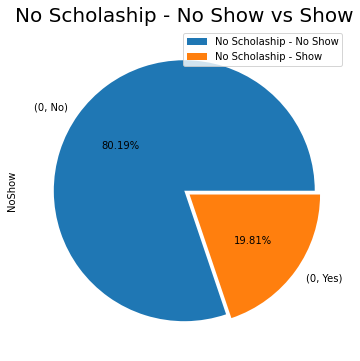

In [48]:
#Pie chart showing the percentage of patients without scholarship who showed up or didn't show up for their appointment
No_scholarship = df[df['Scholarship'] == 0]
No_scholarship.groupby('Scholarship')['NoShow'].value_counts().plot(kind = 'pie',figsize=(6,6), autopct='%.2f%%', startangle=0, explode=(0, .05))
plt.title('No Scholaship - No Show vs Show', fontsize=20)
plt.legend(["No Scholaship - No Show", "No Scholaship - Show"]);

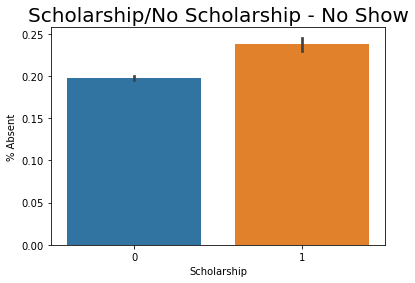

In [49]:
#bar graph of the percentage of noshows for patients with or without scholarship
plt.title('Scholarship/No Scholarship - No Show', fontsize=20);
ax = sns.barplot(x=df.Scholarship, y=df.BinNoShow)
ax.set(ylabel='% Absent')
plt.show()

Generally, it seems patients with scholarships miss appointments more patients without scholarships.

<a id='conclusions'></a>
## Conclusions
Based on the analyzed dataset, it was found that almost 80% (specifically 79.81%) of patients attended their appointments, while 20.19% of patients missed their appointments. When considering gender, it was noticed that females had a higher percentage of missed appointments compared to males when analyzed separately. However, it is important to note that the population of male patients was smaller than that of female patients, which could have affected the percentage figures if the number of male patients was equal to that of females.

Moreover, the dataset indicated that different age groups had varying percentages of no-shows, with the elderly missing the least number of appointments and teenagers missing the most. Although it is not definitive, it is possible that the elderly miss fewer appointments because they become more conscious of their health as they grow older.

Furthermore, certain days of the week had higher percentages of no-shows, with Saturday having the least number of appointments but the highest percentage of no-shows. Surprisingly, the relationship between receiving SMS reminders and no-shows was opposite to what was expected, with patients who received SMS reminders having a higher percentage of no-shows.

Lastly, patients with scholarships were found to miss their appointments more than those without scholarships.

​
#### Limitation
A significant limitation of this analysis was the absence of some background information for the patients. or instance, it was discovered that only about 32% of the appointments had received SMS notifications. However, it is possible that those patients were only encouraged to enroll in SMS notifications after missing appointments, suggesting that they were already experiencing difficulties keeping up with their appointments

Another limitation of is that although there is some data on the patients' conditions, there is no information on the specific health reasons for each appointment. This absence of information is problematic since some health reasons are more life-threatening than others, and patients with such conditions may be more likely to attend their appointments compared to those with less severe conditions.

### References
Below is a list of websites that I referred to aid in my project.

* https://stackoverflow.com/questions/41256648/select-multiple-ranges-of-columns-in-pandas-dataframe
* https://pandas.pydata.org/docs/reference/frame.html
* https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html
* https://stackoverflow.com/questions/41514173/change-multiple-columns-in-pandas-dataframe-to-datetime
* https://stackoverflow.com/questions/66969339/creating-new-column-with-ranges-based-on-existing-column
* https://www.geeksforgeeks.org/python-pandas-series-to_frame/#:~:text=to_frame()%20function%20is%20used,series%20object%20to%20a%20dataframe.&text=Parameter%20%3A,(if%20it%20has%20one).
* https://stackoverflow.com/questions/57967761/how-to-sum-up-yes-and-no-into-a-total-quantity-using-matplotlib-pandas-python
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
* https://stackoverflow.com/questions/30222533/create-a-day-of-week-column-in-a-pandas-dataframe-using-python
* https://stackoverflow.com/questions/60339049/weekday-name-from-a-pandas-dataframe-date-object 
* https://stackoverflow.com/questions/35692781/python-plotting-percentage-in-seaborn-bar-plot
* https://www.geeksforgeeks.org/seaborn-barplot-method-in-python/
* https://www.kaggle.com/datasets/joniarroba/noshowappointments
* https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/

